In [ ]:
# Connect the notebook to the Google drive

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Go to the project directory - Add the name of your project folder after My Drive

%cd gdrive/My Drive/FAKE_REVIEW

/content/gdrive/My Drive/FAKE_REVIEW


In [ ]:
# check the directory

!ls

data.csv  DNNmodel.h5	Forest.pickle	  Project.ipynb  Test.ipynb
Datasets  DTree.pickle	knn_model.pickle  Test_data	 XGB_model.pickle


In [ ]:
# Install this library to deal with texts and get text statistics

!pip install textstat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 10.5 MB/s eta 0:00:00


# Data analysis, Visualization, and Preprocessing

# Dataset1: The Amazon Product Review Dataset

In [ ]:
# Import necessary libraries

import numpy as np # For numerical operations
import pandas as pd # For dataset and dataframe based operations
import matplotlib.pyplot as plt # For plotting and visualizations
import seaborn as sns # For plotting and visualizations
import textstat # To deal with texts and get text statistics
from textstat.textstat import textstat
import nltk # Natural Language Tool Kit for processing texts
color = sns.color_palette()
from sklearn.preprocessing import LabelEncoder # The label encoder
from sklearn.model_selection import train_test_split# FOr train test split the dataset
import pickle # to save the trained model in .pickle format


# To calculate the performance evaluation metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

In [ ]:
!ls Datasets

 amazon_reviews.txt  'Yelp Dataset Reduced.csv'


In [ ]:
data = pd.read_csv("Datasets/amazon_reviews.txt", delimiter = "\t")

In [ ]:
# See the dataset

data.head()

,eDOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT
0,1,__label1__,4,N,PC,B00008NG7N,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will sav..."
1,2,__label1__,4,Y,Wireless,B00LH0Y3NM,Note 3 Battery : Stalion Strength Replacement ...,New era for batteries,Lithium batteries are something new introduced...
2,3,__label1__,3,N,Baby,B000I5UZ1Q,"Fisher-Price Papasan Cradle Swing, Starlight",doesn't swing very well.,I purchased this swing for my baby. She is 6 m...
3,4,__label1__,4,N,Office Products,B003822IRA,Casio MS-80B Standard Function Desktop Calculator,Great computing!,I was looking for an inexpensive desk calcolat...
4,5,__label1__,4,N,Beauty,B00PWSAXAM,Shine Whitening - Zero Peroxide Teeth Whitenin...,Only use twice a week,I only use it twice a week and the results are...


In [ ]:
# Get the dimension of the data

data.shape

(21000, 9)

#### We can see that there are 21000 samples in the datset

In [ ]:
# Convert the labels into numbers

data.loc[data["LABEL"] == "__label1__", "LABEL"] = '1'
data.loc[data["LABEL"] == "__label2__", "LABEL"] = '0'

NameError: name 'data' is not defined

In [ ]:
# Now check the data

data.head()

,eDOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT
0,1,1,4,N,PC,B00008NG7N,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will sav..."
1,2,1,4,Y,Wireless,B00LH0Y3NM,Note 3 Battery : Stalion Strength Replacement ...,New era for batteries,Lithium batteries are something new introduced...
2,3,1,3,N,Baby,B000I5UZ1Q,"Fisher-Price Papasan Cradle Swing, Starlight",doesn't swing very well.,I purchased this swing for my baby. She is 6 m...
3,4,1,4,N,Office Products,B003822IRA,Casio MS-80B Standard Function Desktop Calculator,Great computing!,I was looking for an inexpensive desk calcolat...
4,5,1,4,N,Beauty,B00PWSAXAM,Shine Whitening - Zero Peroxide Teeth Whitenin...,Only use twice a week,I only use it twice a week and the results are...


In [ ]:
# CHeck the number of different types of labels

data.LABEL.value_counts()

1    10500
0    10500
Name: LABEL, dtype: int64

#### So there are 10500 fake and 10500 original labels

In [ ]:
# See the columns in the data

data.columns

Index(['eDOC_ID', 'LABEL', 'RATING', 'VERIFIED_PURCHASE', 'PRODUCT_CATEGORY',
       'PRODUCT_ID', 'PRODUCT_TITLE', 'REVIEW_TITLE', 'REVIEW_TEXT'],
      dtype='object')

#### Analayze the columns one by one

In [ ]:
# eDOC_ID column is an index number

data.eDOC_ID.nunique()

21000

In [ ]:
# This is the label column with 10500 '0' labels and 10500 '1' labels

data.LABEL.unique()

array(['1', '0'], dtype=object)

In [ ]:
data.RATING.unique()

array([4, 3, 1, 2, 5])

In [ ]:
# RATING is the rating of the product form 1 to 5

In [ ]:
# See how is the rating distributes

cnt_srs = data.groupby(data["LABEL"]).RATING.value_counts()
cnt_srs

LABEL  RATING
0      5         6151
       4         1974
       3          942
       1          868
       2          565
1      5         6059
       4         1999
       3          926
       1          889
       2          627
Name: RATING, dtype: int64

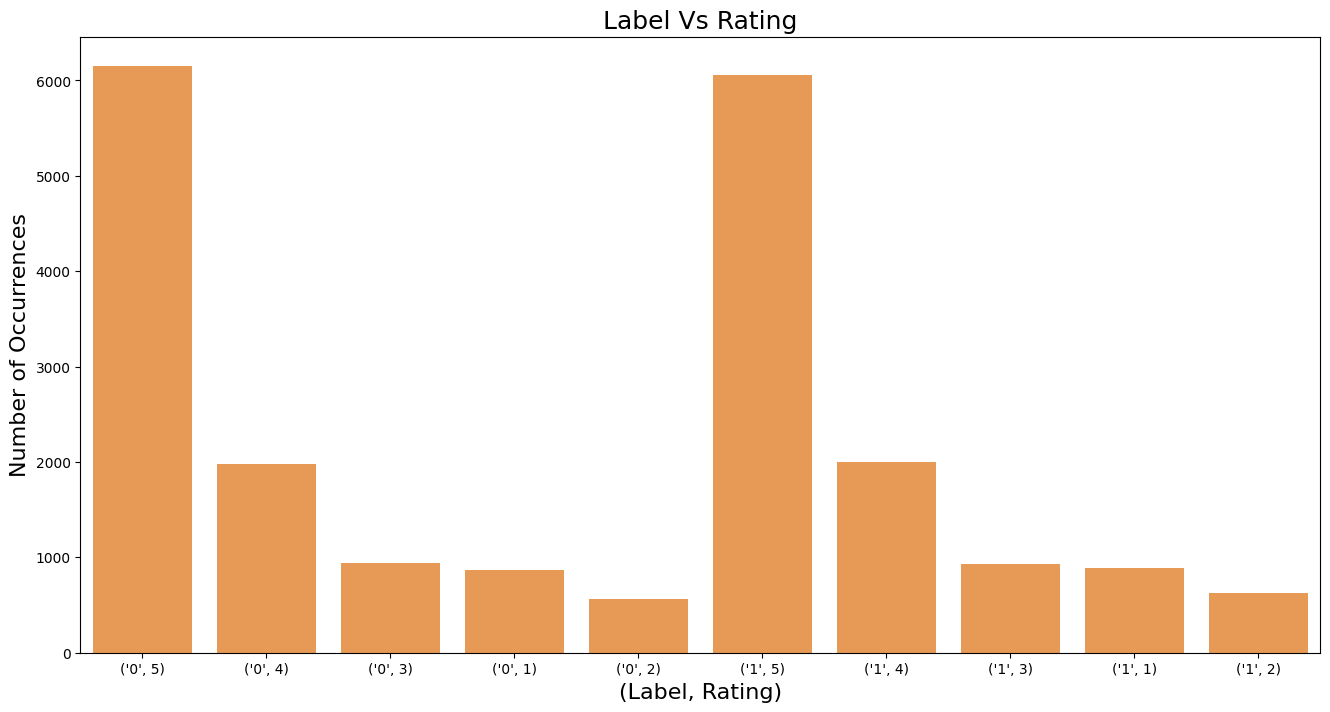

In [ ]:
# Visualiaze the distribution of RATING across fake and original reviews

strs = []

for i in range(len(cnt_srs.index)):
  p = str(cnt_srs.index[i])
  strs.append(p)



plt.figure(figsize=(16,8))
sns.barplot(x=strs, y=cnt_srs.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=16)
plt.xlabel('(Label, Rating)', fontsize=16)
plt.title('Label Vs Rating', fontsize=18)
plt.xticks(rotation='horizontal')
plt.show()

In [ ]:
# Verified Puracvhase or not

data.VERIFIED_PURCHASE.value_counts()

Y    11698
N     9302
Name: VERIFIED_PURCHASE, dtype: int64

In [ ]:
# Check how many are in fake and original review

cnt_srs = data.groupby("VERIFIED_PURCHASE").LABEL.value_counts()
cnt_srs

VERIFIED_PURCHASE  LABEL
N                  1        7623
                   0        1679
Y                  0        8821
                   1        2877
Name: LABEL, dtype: int64

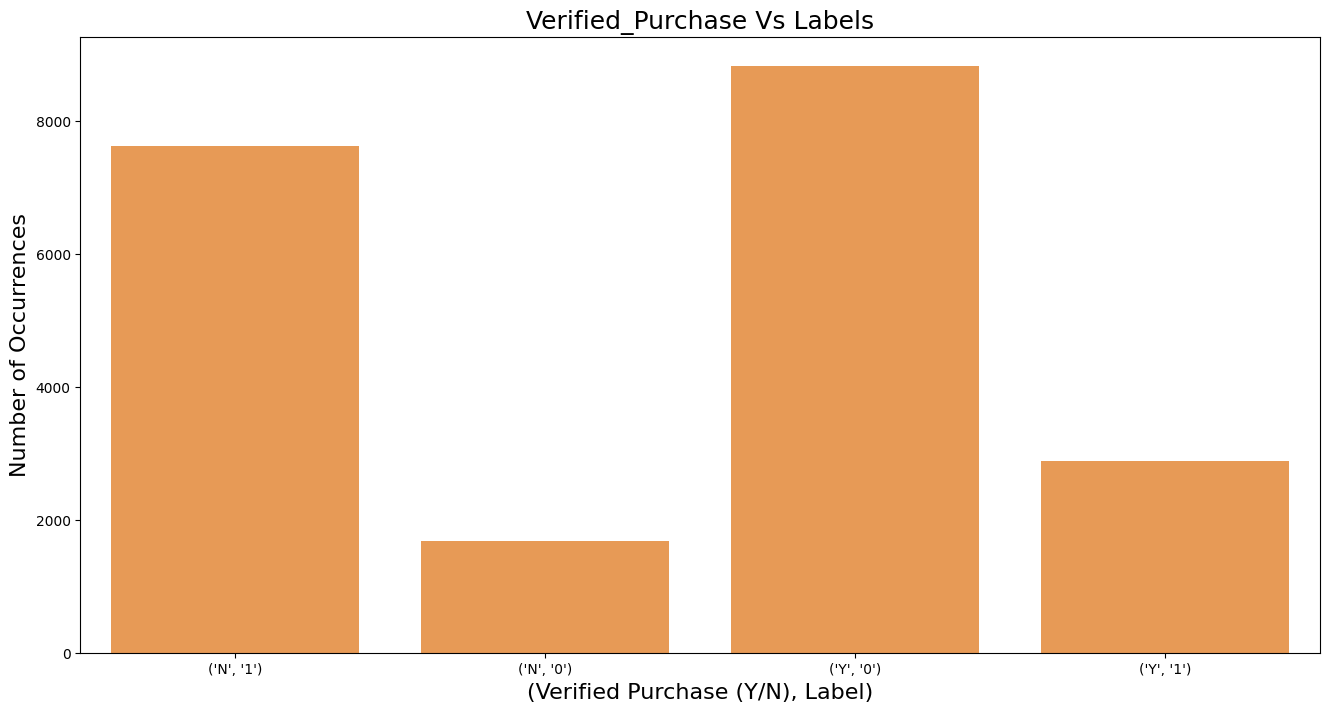

In [ ]:
# Visualiaze the distribution of VERIFIED PURCHASES across fake and original reviews

strs = []

for i in range(len(cnt_srs.index)):
  p = str(cnt_srs.index[i])
  strs.append(p)

plt.figure(figsize=(16,8))
sns.barplot(x = strs, y=cnt_srs.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=16)
plt.xlabel('(Verified Purchase (Y/N), Label)', fontsize=16)
plt.title('Verified_Purchase Vs Labels', fontsize=18)
plt.xticks(rotation='horizontal')
plt.show()

In [ ]:
# Different product categories

data.PRODUCT_CATEGORY.nunique()

30

#### SO there are 30 different prodcuct categories

In [ ]:
# See what are the categories

data.PRODUCT_CATEGORY.unique()

array(['PC', 'Wireless', 'Baby', 'Office Products', 'Beauty',
       'Health & Personal Care', 'Toys', 'Kitchen', 'Furniture',
       'Electronics', 'Camera', 'Sports', 'Home', 'Jewelry', 'Books',
       'Grocery', 'Video DVD', 'Tools', 'Home Improvement', 'Shoes',
       'Outdoors', 'Luggage', 'Video Games', 'Apparel', 'Lawn and Garden',
       'Pet Products', 'Home Entertainment', 'Musical Instruments',
       'Watches', 'Automotive'], dtype=object)

In [ ]:
data.PRODUCT_CATEGORY.value_counts()

PC                        700
Wireless                  700
Watches                   700
Musical Instruments       700
Home Entertainment        700
Pet Products              700
Lawn and Garden           700
Apparel                   700
Video Games               700
Luggage                   700
Outdoors                  700
Shoes                     700
Home Improvement          700
Tools                     700
Video DVD                 700
Grocery                   700
Books                     700
Jewelry                   700
Home                      700
Sports                    700
Camera                    700
Electronics               700
Furniture                 700
Kitchen                   700
Toys                      700
Health & Personal Care    700
Beauty                    700
Office Products           700
Baby                      700
Automotive                700
Name: PRODUCT_CATEGORY, dtype: int64

#### There are 700 samples in each category so 700*30 = 21000 a well distributed data

In [ ]:
# Check how many are in fake and original review

values = data.groupby(data["LABEL"]).PRODUCT_CATEGORY.value_counts()
values

LABEL  PRODUCT_CATEGORY      
0      Apparel                   350
       Automotive                350
       Baby                      350
       Beauty                    350
       Books                     350
       Camera                    350
       Electronics               350
       Furniture                 350
       Grocery                   350
       Health & Personal Care    350
       Home                      350
       Home Entertainment        350
       Home Improvement          350
       Jewelry                   350
       Kitchen                   350
       Lawn and Garden           350
       Luggage                   350
       Musical Instruments       350
       Office Products           350
       Outdoors                  350
       PC                        350
       Pet Products              350
       Shoes                     350
       Sports                    350
       Tools                     350
       Toys                      350
       V

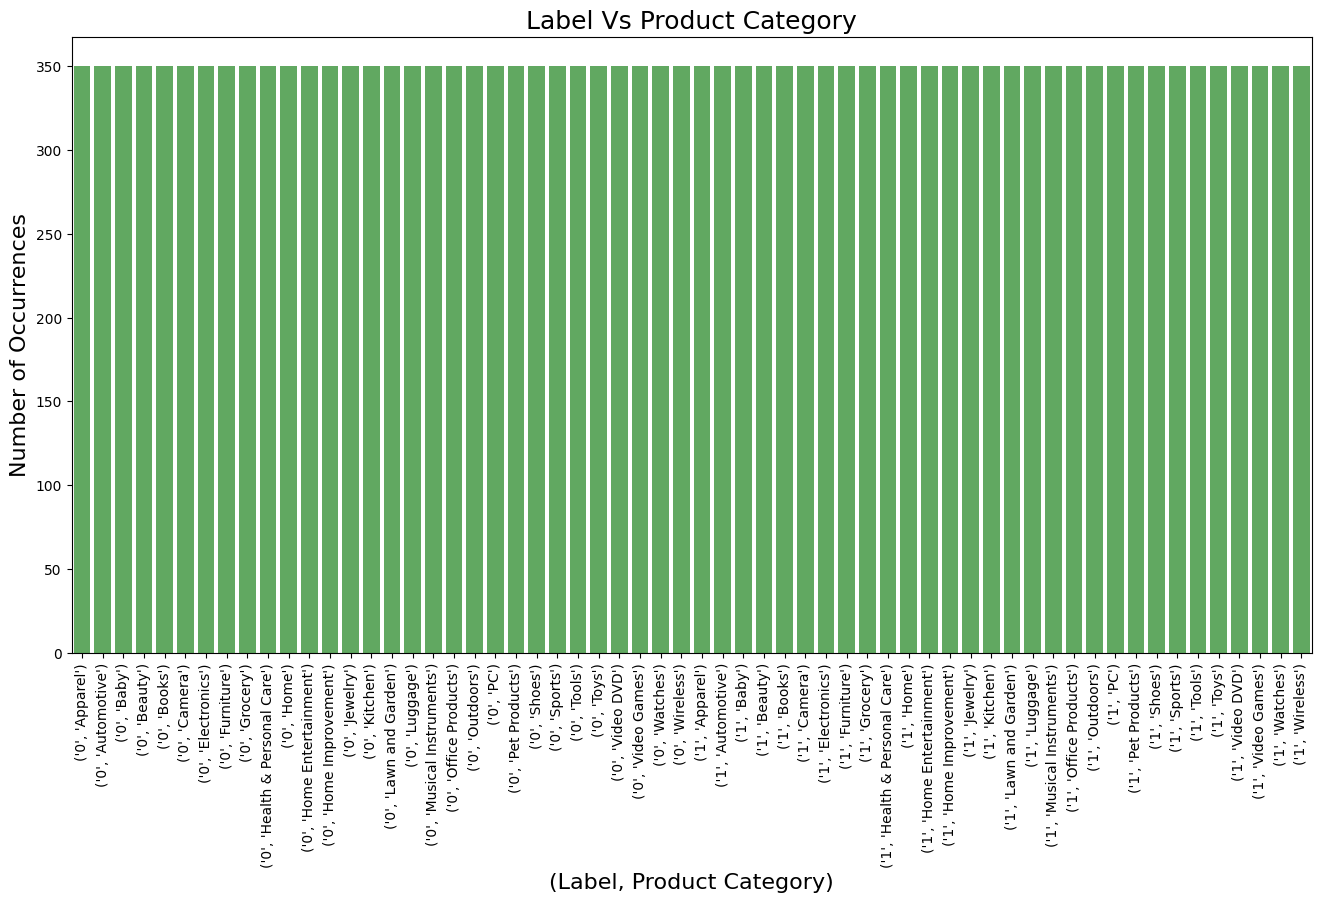

In [ ]:
# Visualiaze the distribution of product categoris across fake and original reviews

strs = []

for i in range(len(values.index)):
  p = str(values.index[i])
  strs.append(p)


plt.figure(figsize=(16,8))
sns.barplot(x=strs, y=values.values, alpha=0.8, color=color[2])
plt.ylabel('Number of Occurrences', fontsize=16)
plt.xlabel('(Label, Product Category)', fontsize=16)
plt.title('Label Vs Product Category', fontsize=18)
plt.xticks(rotation='vertical')
plt.show()

#### This is also well distributed - 350 in fake revies and 350 in orginal reviews

In [ ]:
# See product id

data.PRODUCT_ID.nunique()

18857

#### There are only 18857 products so some products are repeating.

In [ ]:
# See product title

data.PRODUCT_TITLE.nunique()

18865

In [ ]:
data.REVIEW_TITLE.nunique()

18476

In [ ]:
# check dulicates or repetition of reviews

data.REVIEW_TEXT.nunique()

21000

#### No repititions, there are 21000 unique reviews

####  Now analyze the word length

In [ ]:
data2 = data.groupby("LABEL").REVIEW_TEXT

In [ ]:
# Create a new column with text lenghths

data['TEXT_LENGTH'] = data['REVIEW_TEXT'].apply(len)

In [ ]:
# See the data now

data.head()

,eDOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT,TEXT_LENGTH
0,1,1,4,N,PC,B00008NG7N,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will sav...",116
1,2,1,4,Y,Wireless,B00LH0Y3NM,Note 3 Battery : Stalion Strength Replacement ...,New era for batteries,Lithium batteries are something new introduced...,404
2,3,1,3,N,Baby,B000I5UZ1Q,"Fisher-Price Papasan Cradle Swing, Starlight",doesn't swing very well.,I purchased this swing for my baby. She is 6 m...,248
3,4,1,4,N,Office Products,B003822IRA,Casio MS-80B Standard Function Desktop Calculator,Great computing!,I was looking for an inexpensive desk calcolat...,212
4,5,1,4,N,Beauty,B00PWSAXAM,Shine Whitening - Zero Peroxide Teeth Whitenin...,Only use twice a week,I only use it twice a week and the results are...,331


In [ ]:
# See the average text length in two categories

cnt_srs = data.groupby(["LABEL"]).TEXT_LENGTH.agg(lambda x: sum(x)/len(x))
cnt_srs

LABEL
0    428.102857
1    316.550000
Name: TEXT_LENGTH, dtype: float64

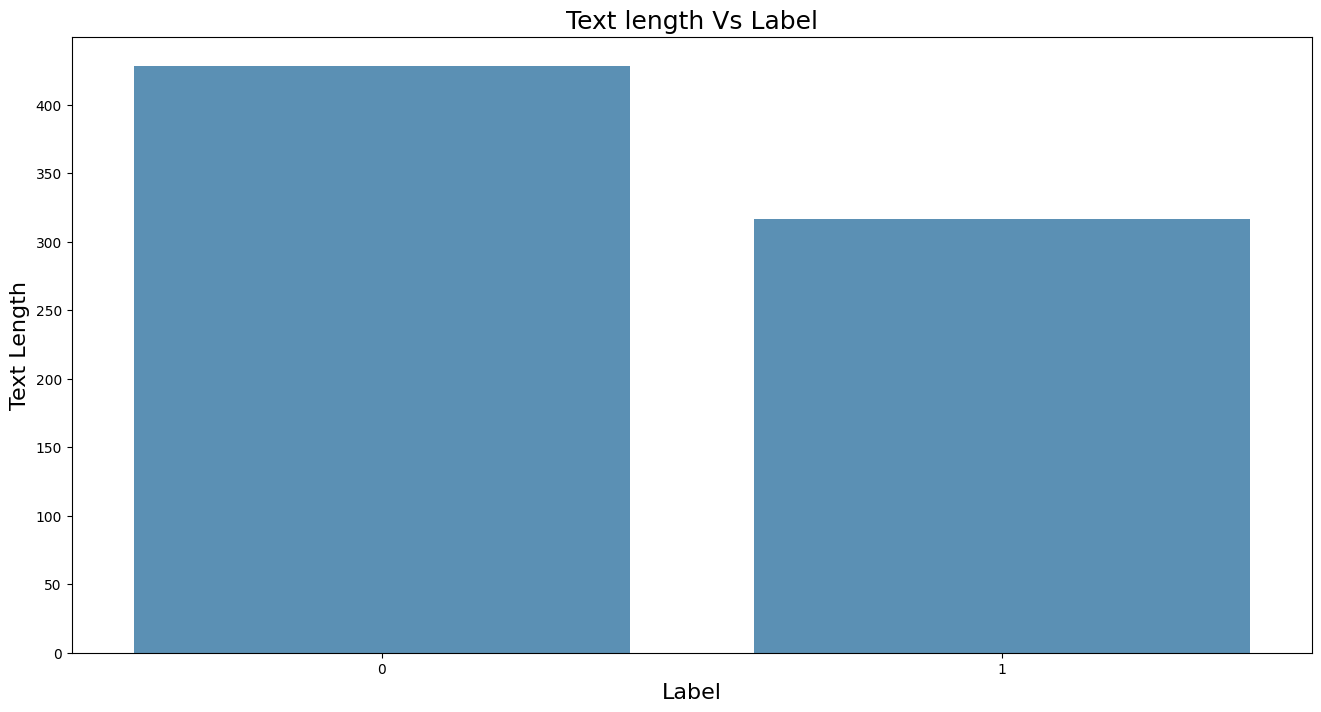

In [ ]:
plt.figure(figsize=(16,8))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha=0.8, color=color[0])
plt.ylabel('Text Length', fontsize=16)
plt.xlabel('Label', fontsize=16)
plt.title('Text length Vs Label', fontsize=18)
plt.xticks(rotation='horizontal')
plt.show()

In [ ]:
# Make a new column with number of sentences in the review text

data['num_sentences'] = data['REVIEW_TEXT'].apply(lambda x: len(str(x).split('.')))

In [ ]:
# See the data now

data.head()

,eDOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT,TEXT_LENGTH,num_sentences
0,1,1,4,N,PC,B00008NG7N,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will sav...",116,3
1,2,1,4,Y,Wireless,B00LH0Y3NM,Note 3 Battery : Stalion Strength Replacement ...,New era for batteries,Lithium batteries are something new introduced...,404,4
2,3,1,3,N,Baby,B000I5UZ1Q,"Fisher-Price Papasan Cradle Swing, Starlight",doesn't swing very well.,I purchased this swing for my baby. She is 6 m...,248,6
3,4,1,4,N,Office Products,B003822IRA,Casio MS-80B Standard Function Desktop Calculator,Great computing!,I was looking for an inexpensive desk calcolat...,212,5
4,5,1,4,N,Beauty,B00PWSAXAM,Shine Whitening - Zero Peroxide Teeth Whitenin...,Only use twice a week,I only use it twice a week and the results are...,331,4


#### Now calculate the flesch_kincaid_grade of each review
#### Is it a readability score of a text
#### Reference: https://serpninja.io/tools/flesch-kincaid-calculator/

https://en.wikipedia.org/wiki/Flesch%E2%80%93Kincaid_readability_tests

#### The Flesch–Kincaid readability tests are readability tests designed to indicate how difficult a passage in English is to understand.

In [ ]:
# add a new column for FK score

data["FK_Score"] = data["REVIEW_TEXT"].apply(textstat.flesch_kincaid_grade)

In [ ]:
# See the data now

data.head()

,eDOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT,TEXT_LENGTH,num_sentences,FK_Score
0,1,1,4,N,PC,B00008NG7N,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will sav...",116,3,1.9
1,2,1,4,Y,Wireless,B00LH0Y3NM,Note 3 Battery : Stalion Strength Replacement ...,New era for batteries,Lithium batteries are something new introduced...,404,4,11.1
2,3,1,3,N,Baby,B000I5UZ1Q,"Fisher-Price Papasan Cradle Swing, Starlight",doesn't swing very well.,I purchased this swing for my baby. She is 6 m...,248,6,2.6
3,4,1,4,N,Office Products,B003822IRA,Casio MS-80B Standard Function Desktop Calculator,Great computing!,I was looking for an inexpensive desk calcolat...,212,5,4.0
4,5,1,4,N,Beauty,B00PWSAXAM,Shine Whitening - Zero Peroxide Teeth Whitenin...,Only use twice a week,I only use it twice a week and the results are...,331,4,8.3


In [ ]:
# See how the score is for fake and original reviews

cnt_srs = data.groupby(["LABEL"]).FK_Score.agg(lambda x: sum(x)/len(x))
cnt_srs

LABEL
0    5.558076
1    5.697829
Name: FK_Score, dtype: float64

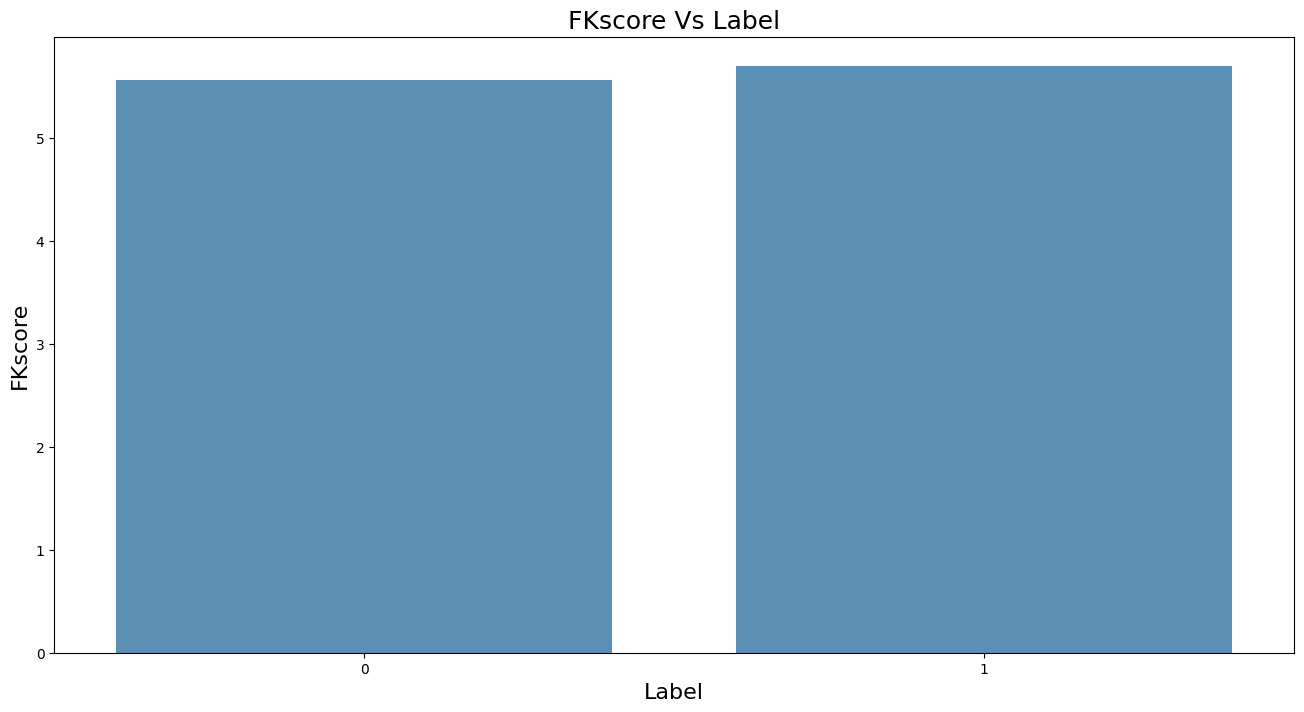

In [ ]:
plt.figure(figsize=(16,8))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha=0.8, color=color[0])
plt.ylabel('FKscore', fontsize=16)
plt.xlabel('Label', fontsize=16)
plt.title('FKscore Vs Label', fontsize=18)
plt.xticks(rotation='horizontal')
plt.show()

#### Now count stop words (words like 'to', 'and', 'from')

In [ ]:
nltk.download('stopwords')
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Function to count stop words

def stopCount(x):
    sum =0
    for char in x.split():
        sum+= char in stop_words
    return sum

In [ ]:
# make a new column with stop word count in it

data['stop_count'] = data['REVIEW_TEXT'].apply(stopCount)

In [ ]:
# See the dataset now

data.head()

,eDOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT,TEXT_LENGTH,num_sentences,FK_Score,stop_count
0,1,1,4,N,PC,B00008NG7N,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will sav...",116,3,1.9,10
1,2,1,4,Y,Wireless,B00LH0Y3NM,Note 3 Battery : Stalion Strength Replacement ...,New era for batteries,Lithium batteries are something new introduced...,404,4,11.1,28
2,3,1,3,N,Baby,B000I5UZ1Q,"Fisher-Price Papasan Cradle Swing, Starlight",doesn't swing very well.,I purchased this swing for my baby. She is 6 m...,248,6,2.6,25
3,4,1,4,N,Office Products,B003822IRA,Casio MS-80B Standard Function Desktop Calculator,Great computing!,I was looking for an inexpensive desk calcolat...,212,5,4.0,18
4,5,1,4,N,Beauty,B00PWSAXAM,Shine Whitening - Zero Peroxide Teeth Whitenin...,Only use twice a week,I only use it twice a week and the results are...,331,4,8.3,34


In [ ]:
# See how the number of stop words differn in the two categories

cnt_srs = data.groupby(["LABEL"]).stop_count.agg(lambda x: sum(x)/len(x))
cnt_srs

LABEL
0    32.519048
1    24.696190
Name: stop_count, dtype: float64

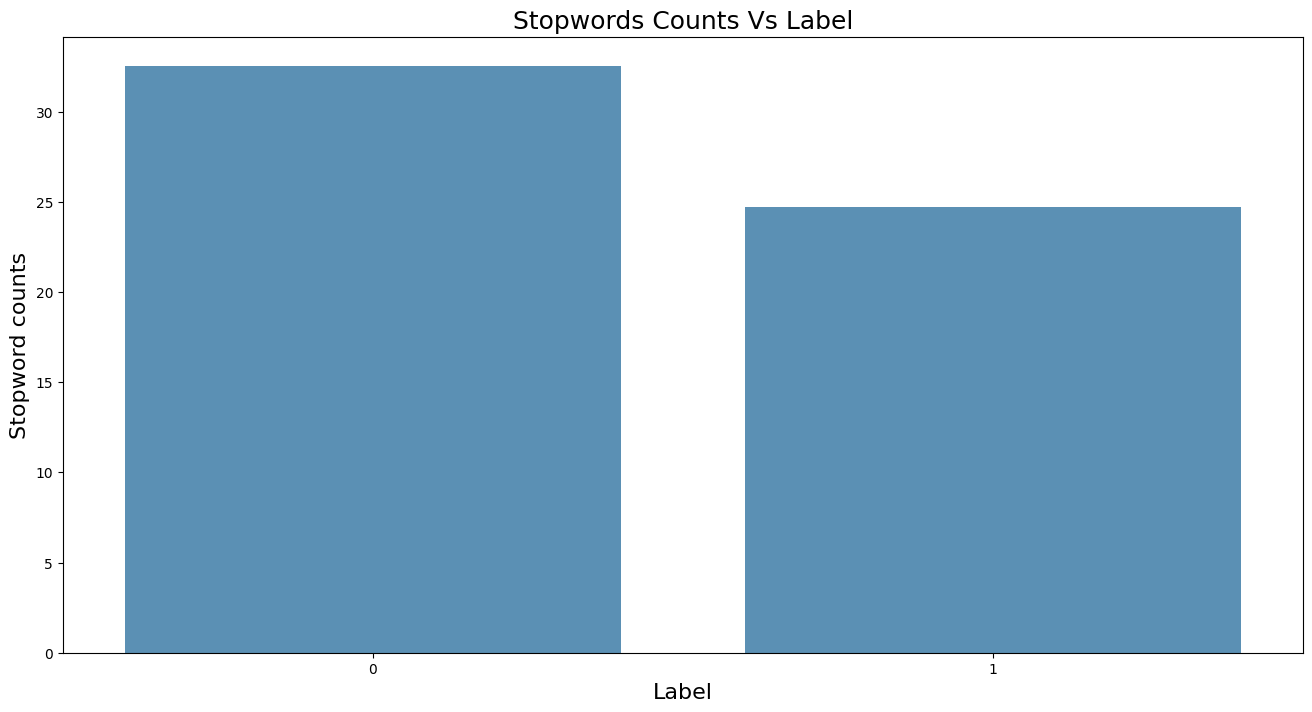

In [ ]:
plt.figure(figsize=(16,8))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha=0.8, color=color[0])
plt.ylabel('Stopword counts', fontsize=16)
plt.xlabel('Label', fontsize=16)
plt.title('Stopwords Counts Vs Label', fontsize=18)
plt.xticks(rotation='horizontal')
plt.show()

#### Now count Cupper case letters

In [ ]:
# Function to count uper case letters

def capsCount(x):
    sum =0
    for char in x:
        sum+= char in "QWERTYUIOPASDFGHJKLZXCVBNM"
    return sum

In [ ]:
# make a new column for that

data['caps_count'] = data['REVIEW_TEXT'].apply(capsCount)

In [ ]:
# See the data now

data.head()

,eDOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT,TEXT_LENGTH,num_sentences,FK_Score,stop_count,caps_count
0,1,1,4,N,PC,B00008NG7N,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will sav...",116,3,1.9,10,2
1,2,1,4,Y,Wireless,B00LH0Y3NM,Note 3 Battery : Stalion Strength Replacement ...,New era for batteries,Lithium batteries are something new introduced...,404,4,11.1,28,4
2,3,1,3,N,Baby,B000I5UZ1Q,"Fisher-Price Papasan Cradle Swing, Starlight",doesn't swing very well.,I purchased this swing for my baby. She is 6 m...,248,6,2.6,25,6
3,4,1,4,N,Office Products,B003822IRA,Casio MS-80B Standard Function Desktop Calculator,Great computing!,I was looking for an inexpensive desk calcolat...,212,5,4.0,18,6
4,5,1,4,N,Beauty,B00PWSAXAM,Shine Whitening - Zero Peroxide Teeth Whitenin...,Only use twice a week,I only use it twice a week and the results are...,331,4,8.3,34,4


In [ ]:
# See how this  is distributed among the two classess

cnt_srs = data.groupby(["LABEL"]).caps_count.agg(lambda x: sum(x)/len(x))
cnt_srs

LABEL
0    12.099810
1     8.712667
Name: caps_count, dtype: float64

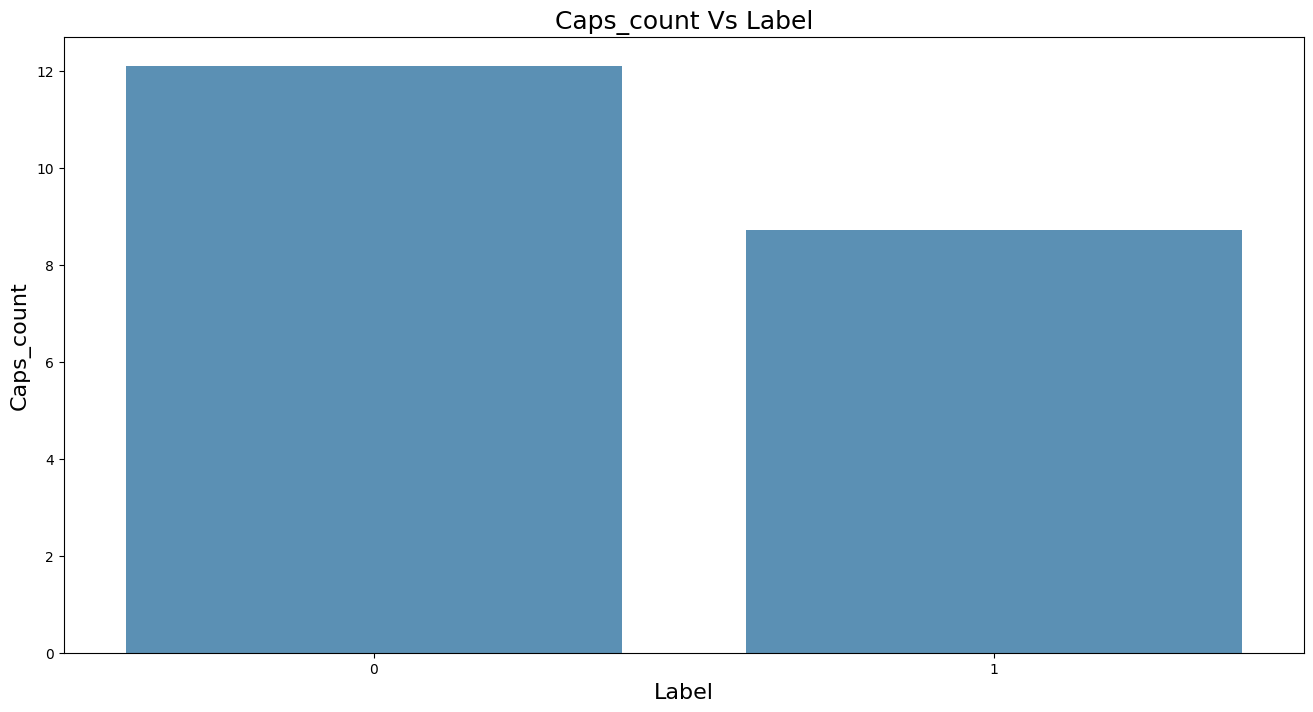

In [ ]:
plt.figure(figsize=(16,8))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha=0.8, color=color[0])
plt.ylabel('Caps_count', fontsize=16)
plt.xlabel('Label', fontsize=16)
plt.title('Caps_count Vs Label', fontsize=18)
plt.xticks(rotation='horizontal')
plt.show()


#### now check for emojis

In [ ]:
# Add new column for emoji in the text

data["emojis"] = data["REVIEW_TEXT"].apply(lambda x: 1 if ";)" in x.split() or ":)" in x.split() or ":-)" in x.split() else 0)

In [ ]:
# How the number of emojis present in the two classes

cnt_srs = data.groupby(["LABEL"]).emojis.agg(lambda x: sum(x))
cnt_srs

LABEL
0    107
1     85
Name: emojis, dtype: int64

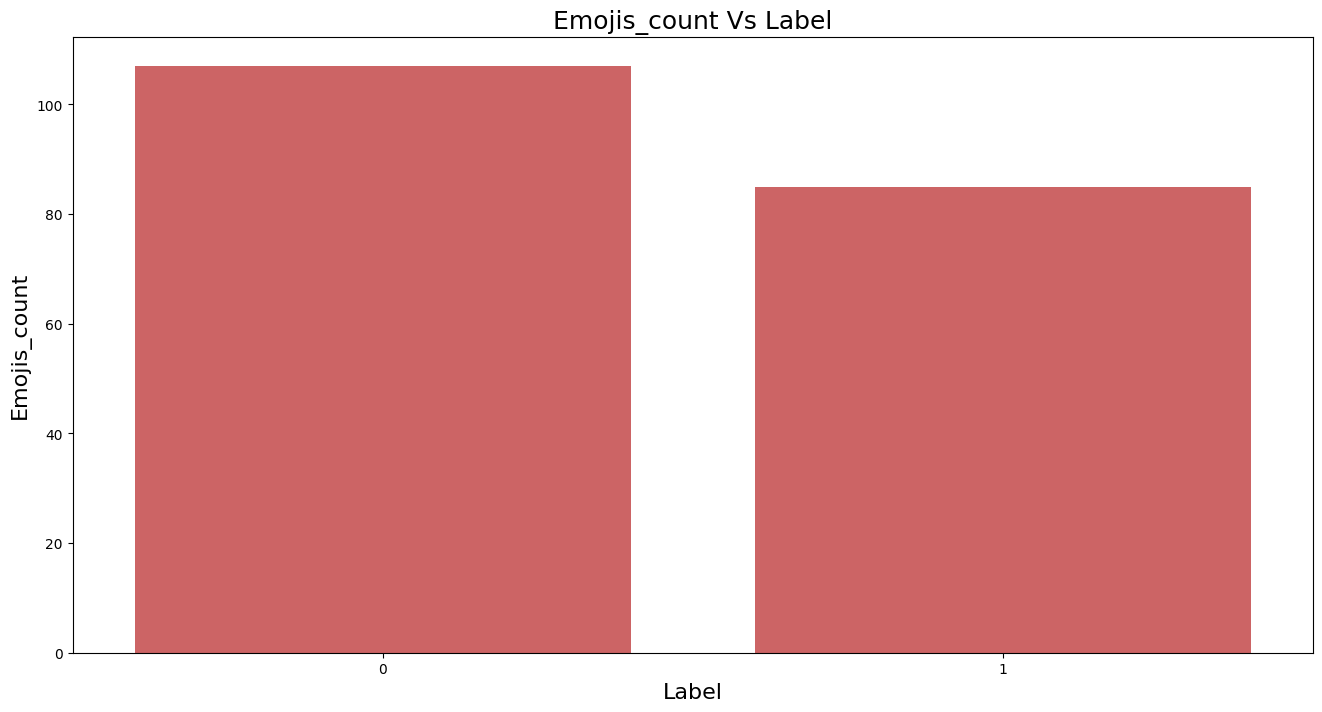

In [ ]:
plt.figure(figsize=(16,8))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha=0.8, color=color[3])
plt.ylabel('Emojis_count', fontsize=16)
plt.xlabel('Label', fontsize=16)
plt.title('Emojis_count Vs Label', fontsize=18)
plt.xticks(rotation='horizontal')
plt.show()


# Jan 29

#### Check our data once again

In [ ]:
data.shape

(21000, 15)

In [ ]:
data.head()

,eDOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT,TEXT_LENGTH,num_sentences,FK_Score,stop_count,caps_count,emojis
0,1,1,4,N,PC,B00008NG7N,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will sav...",116,3,1.9,10,2,0
1,2,1,4,Y,Wireless,B00LH0Y3NM,Note 3 Battery : Stalion Strength Replacement ...,New era for batteries,Lithium batteries are something new introduced...,404,4,11.1,28,4,0
2,3,1,3,N,Baby,B000I5UZ1Q,"Fisher-Price Papasan Cradle Swing, Starlight",doesn't swing very well.,I purchased this swing for my baby. She is 6 m...,248,6,2.6,25,6,0
3,4,1,4,N,Office Products,B003822IRA,Casio MS-80B Standard Function Desktop Calculator,Great computing!,I was looking for an inexpensive desk calcolat...,212,5,4.0,18,6,0
4,5,1,4,N,Beauty,B00PWSAXAM,Shine Whitening - Zero Peroxide Teeth Whitenin...,Only use twice a week,I only use it twice a week and the results are...,331,4,8.3,34,4,0


In [ ]:
data.LABEL.value_counts()

1    10500
0    10500
Name: LABEL, dtype: int64

#### Label encoding

#### label encoding - convert the categorical features into numbers, because ML models can only be trained with numbers

#### In our data, VERIFIED_PURCHASE, PRODUCT_CATEGORY, PRODUCT_ID,  PRODUCT_TITLE, and REVIEW_TITLE are to be converted

In [ ]:
lenc=LabelEncoder()    # Load the label encoder as lenc
data.VERIFIED_PURCHASE=lenc.fit_transform(data.VERIFIED_PURCHASE) # Label encode the "VERIFIED_PURCHASE" column
print(lenc.classes_) # See the categories
print(data.VERIFIED_PURCHASE.unique())  ## Print the converted column now

['N' 'Y']
[0 1]


In [ ]:
# See the data now

data.head()

,eDOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT,TEXT_LENGTH,num_sentences,FK_Score,stop_count,caps_count,emojis
0,1,1,4,0,PC,B00008NG7N,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will sav...",116,3,1.9,10,2,0
1,2,1,4,1,Wireless,B00LH0Y3NM,Note 3 Battery : Stalion Strength Replacement ...,New era for batteries,Lithium batteries are something new introduced...,404,4,11.1,28,4,0
2,3,1,3,0,Baby,B000I5UZ1Q,"Fisher-Price Papasan Cradle Swing, Starlight",doesn't swing very well.,I purchased this swing for my baby. She is 6 m...,248,6,2.6,25,6,0
3,4,1,4,0,Office Products,B003822IRA,Casio MS-80B Standard Function Desktop Calculator,Great computing!,I was looking for an inexpensive desk calcolat...,212,5,4.0,18,6,0
4,5,1,4,0,Beauty,B00PWSAXAM,Shine Whitening - Zero Peroxide Teeth Whitenin...,Only use twice a week,I only use it twice a week and the results are...,331,4,8.3,34,4,0


In [ ]:
# Next "PRODUCT_CATEGORY" column

lenc=LabelEncoder()
data.PRODUCT_CATEGORY = lenc.fit_transform(data.PRODUCT_CATEGORY)
print(lenc.classes_)
print(data.PRODUCT_CATEGORY.unique())

['Apparel' 'Automotive' 'Baby' 'Beauty' 'Books' 'Camera' 'Electronics'
 'Furniture' 'Grocery' 'Health & Personal Care' 'Home'
 'Home Entertainment' 'Home Improvement' 'Jewelry' 'Kitchen'
 'Lawn and Garden' 'Luggage' 'Musical Instruments' 'Office Products'
 'Outdoors' 'PC' 'Pet Products' 'Shoes' 'Sports' 'Tools' 'Toys'
 'Video DVD' 'Video Games' 'Watches' 'Wireless']
[20 29  2 18  3  9 25 14  7  6  5 23 10 13  4  8 26 24 12 22 19 16 27  0
 15 21 11 17 28  1]


In [ ]:
# Next "PRODUCT_ID" column

lenc=LabelEncoder()
data.PRODUCT_ID = lenc.fit_transform(data.PRODUCT_ID)
print(lenc.classes_)
print(data.PRODUCT_ID.unique())

['0006486118' '0028703200' '0060159839' ... 'B011MJ2JE2' 'B011WLIG88'
 'B012D9DB9W']
[  988 16286  2463 ...  2118  9977 11924]


In [ ]:
# Next "PRODUCT_TITLE" column

lenc=LabelEncoder()
data.PRODUCT_TITLE = lenc.fit_transform(data.PRODUCT_TITLE)
print(lenc.classes_)
print(data.PRODUCT_TITLE.unique())

['!!Final Clearance!! Silicone BBQ Star Gloves Silicone Heat Resistant Grilling BBQ Gloves for Cooking, Baking, Smoking & Potholder, !One Pair! ** Bonus Inside ** !!Final Clearance!!'
 '# 1 Caralluma Fimbriata 1000mg – Melt Away the weight with this'
 '#000 4x8" KRAFT BUBBLE MAILER PADDED ENVELOPES-100 qty' ...
 '★**PREMIUM CALMER CATS & DOGS**★ We Have The Best,Top Rated 100% Natural K9 & Kitty Calmer Period●Human Grade Natural Ingredients●Rescue Your Pet From Anxiety, Stress Or Use For Shot To Long Travels'
 "★Limited Introduction Offer★ BBQ Grill Brush 12 inch, World's best Stainless steel barbecue Grill Brush-- One of the Best BBQ Accessories and Tools Around - This BBQ Grill Brush is the Perfect Accessory for Cleaning Charcoal, Gas, Electric and Infrared Outdoor BBQ Grills**FDA Certified and LFGB Approved**Money Back Guarantee**As Seen On TV**PRICE WILL GO UP SOON! Don't mis this opportunity!"
 '★★ MASSIVE 32OZ GLUCOSAMINE★★Best Glucosamine,Chondroitin Sulfate & MSM Liquid Complex

In [ ]:
# Next "REVIEW_TITLE" column

lenc=LabelEncoder()
data.REVIEW_TITLE = lenc.fit_transform(data.REVIEW_TITLE)
print(lenc.classes_)
print(data.REVIEW_TITLE.unique())

['  Works fine for me' '!!!You have to OWN this WATCH!!!' '#1' ...
 '很好like them very much' '非常好' '���� Great Cement����']
[18147  9626 15949 ...  7088 13314  8860]


In [ ]:
# See the data now

data.head()

,eDOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT,TEXT_LENGTH,num_sentences,FK_Score,stop_count,caps_count,emojis
0,1,1,4,0,20,988,15950,18147,"When least you think so, this product will sav...",116,3,1.9,10,2,0
1,2,1,4,1,29,16286,11247,9626,Lithium batteries are something new introduced...,404,4,11.1,28,4,0
2,3,1,3,0,2,2463,5867,15949,I purchased this swing for my baby. She is 6 m...,248,6,2.6,25,6,0
3,4,1,4,0,18,6172,3278,5549,I was looking for an inexpensive desk calcolat...,212,5,4.0,18,6,0
4,5,1,4,0,3,17440,14494,10593,I only use it twice a week and the results are...,331,4,8.3,34,4,0


In [ ]:
### Only column remaining is the Review text column

#### Vectorization of text - convert long text onto tokens of words

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer # the NLP vectorizer

In [ ]:
# Load the vectorizer

vec=TfidfVectorizer(max_features=10000) # Vector size = 10000

In [ ]:
# Vectorize the data

Rev_Vector = vec.fit_transform(data.REVIEW_TEXT.values).toarray()

In [ ]:
Rev_Vector.shape

(21000, 10000)

In [ ]:
Rev_Vector = pd.DataFrame(Rev_Vector)

In [ ]:
Rev_Vector.head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Add this table to dataset

data = pd.concat([data, Rev_Vector], axis=1)

In [ ]:
data.shape

(21000, 10015)

In [ ]:
### We can see 10000 features plus 15 old features

In [ ]:
data.head()

,eDOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT,TEXT_LENGTH,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,1,1,4,0,20,988,15950,18147,"When least you think so, this product will sav...",116,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,1,4,1,29,16286,11247,9626,Lithium batteries are something new introduced...,404,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1,3,0,2,2463,5867,15949,I purchased this swing for my baby. She is 6 m...,248,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1,4,0,18,6172,3278,5549,I was looking for an inexpensive desk calcolat...,212,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,1,4,0,3,17440,14494,10593,I only use it twice a week and the results are...,331,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Save this data as a csv file


data.to_csv('data.csv', index= False)

In [ ]:
# Read the saved dataset

data = pd.read_csv('data.csv')

In [ ]:
data.shape

(21000, 10015)

In [ ]:
!ls

data.csv		 IMG-20240226-WA0106.jpg  immuya.ogx
IMG-20240222-WA0091.jpg  IMG-20240226-WA0107.jpg  Project.ipynb
IMG-20240226-WA0104.jpg  IMG-20240226-WA0109.jpg  Screenshot_20240214-200046.png
IMG-20240226-WA0105.jpg  IMG-20240226-WA0110.jpg


In [ ]:
# Separate y only or the label

y = data['LABEL']

In [ ]:
y.shape

(21000,)

In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: LABEL, dtype: int64

In [ ]:
y.value_counts()

1    10500
0    10500
Name: LABEL, dtype: int64

In [ ]:
# Now get X or the features separately

X = data.drop(['LABEL', 'REVIEW_TEXT'], axis = 1)

In [ ]:
X.shape

(21000, 10013)

In [ ]:
X.head()

,eDOC_ID,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,TEXT_LENGTH,num_sentences,FK_Score,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,1,4,0,20,988,15950,18147,116,3,1.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,4,1,29,16286,11247,9626,404,4,11.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,3,0,2,2463,5867,15949,248,6,2.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,4,0,18,6172,3278,5549,212,5,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,4,0,3,17440,14494,10593,331,4,8.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
## Now we have the final dataset with 21000 samples and 10013 features and a label column

In [ ]:
# Split the total data into train data and test data in the ratio 80:20
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2,shuffle=True)

In [ ]:
# Check the number of samples in train set

X_train.shape

(16800, 10013)

In [ ]:
# Check the number of samples in test set

X_test.shape

(4200, 10013)

# ML model Training

In [ ]:
# importing KNN algorithm

from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# assign KNN algorithm with k=1

knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
# Change the data type of train features

X_train.columns = X_train.columns.astype(str)

In [ ]:
# Train/fit the data using the training data

knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
# Make predictions on the test data and save the predicted results to y_pred

y_pred=knn.predict(X_test)

In [ ]:
# match the predicted values and actual y_test to get the accuracy of the model

accuracy = np.mean(y_pred == y_test)

In [ ]:
print(accuracy)

0.9811904761904762


In [ ]:
# Save the model

filename = "knn_model.pickle"

# save model
pickle.dump(knn, open(filename, "wb"))

In [ ]:
!ls

 data.csv		 'Fake Review detection.pptx'   phishing_dataset.csv
 Data_Exploration.ipynb   knn_model.pickle	        Project.ipynb
 Datasets		  Learn_Basics.ipynb	        XGB_model.pickle


#### Calculate the evaluation metrics

In [ ]:
# Load the saved model

knn_model = pickle.load(open("knn_model.pickle", "rb"))

In [ ]:
# Make predictions

y_pred=knn_model.predict(X_test)

<Axes: >

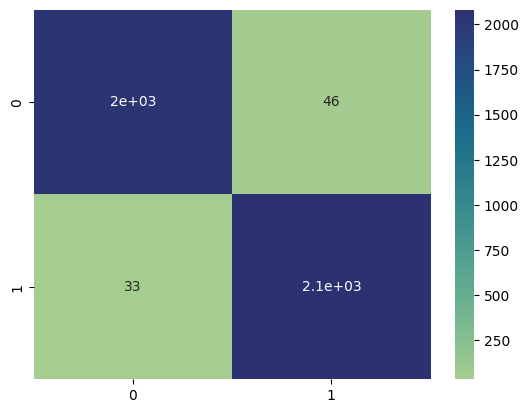

In [ ]:
# print the confusion matrix

cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, cmap="crest")

In [ ]:
cf_matrix

array([[2039,   46],
       [  33, 2082]])

#### Now print other metrics such as accuracy, precision, recall, and F1 score

In [ ]:
print(accuracy_score(y_test, y_pred))

0.9811904761904762


In [ ]:
print(precision_score(y_test, y_pred))

0.9783834586466166


In [ ]:
print(recall_score(y_test, y_pred))

0.9843971631205674


In [ ]:
print(f1_score(y_test, y_pred))

0.9813810982795192


# Train DL model

In [ ]:
import keras
from keras.models import Sequential   # importing Sequential model
from keras.layers import Dense        # importing Dense layers


# declaring model
basic_model = Sequential()

# Adding layers to the model
# First layers: 16 neurons/perceptrons that takes the input and uses 'sigmoid' activation function.
basic_model.add(Dense(units = 1024 , activation = 'sigmoid', input_shape = (10013,)))
basic_model.add(Dense(units = 1024 , activation = 'sigmoid'))
basic_model.add(Dense(units = 512 , activation = 'sigmoid'))
basic_model.add(Dense(units = 256 , activation = 'sigmoid'))
basic_model.add(Dense(units = 128 , activation = 'sigmoid'))
basic_model.add(Dense(units = 128 , activation = 'sigmoid'))
# Second layer: 1 neuron/perceptron that takes the input from the 1st layers and gives output as 0 or 1.Activation used is 'Hard Sigmoid'
basic_model.add(Dense(1, activation = 'hard_sigmoid'))

In [ ]:
# compiling the model
sgd = keras.optimizers.SGD(lr=0.5, momentum=0.9, nesterov=True)
basic_model.compile(loss = 'binary_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

In [ ]:
# training the model
basic_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
525/525 [==============================] - 9s 6ms/step - loss: 0.6935 - accuracy: 0.4958
Epoch 2/100
525/525 [==============================] - 3s 6ms/step - loss: 0.6927 - accuracy: 0.5115
Epoch 3/100
525/525 [==============================] - 4s 7ms/step - loss: 0.6923 - accuracy: 0.5186
Epoch 4/100
525/525 [==============================] - 3s 6ms/step - loss: 0.6919 - accuracy: 0.5230
Epoch 5/100
525/525 [==============================] - 3s 6ms/step - loss: 0.6913 - accuracy: 0.5290
Epoch 6/100
525/525 [==============================] - 3s 6ms/step - loss: 0.6905 - accuracy: 0.5429
Epoch 7/100
525/525 [==============================] - 4s 7ms/step - loss: 0.6895 - accuracy: 0.5436
Epoch 8/100
525/525 [==============================] - 3s 6ms/step - loss: 0.6884 - accuracy: 0.5835
Epoch 9/100
525/525 [==============================] - 3s 6ms/step - loss: 0.6864 - accuracy: 0.6030
Epoch 10/100
525/525 [==============================] - 3s 6ms/step - loss: 0.6840 - accura

In [ ]:
# Save the model

# Save the model


basic_model.save('DNNmodel.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
!ls

data.csv		 IMG-20240226-WA0105.jpg  IMG-20240226-WA0110.jpg
DNNmodel.h5		 IMG-20240226-WA0106.jpg  immuya.ogx
IMG-20240222-WA0091.jpg  IMG-20240226-WA0107.jpg  Project.ipynb
IMG-20240226-WA0104.jpg  IMG-20240226-WA0109.jpg  Screenshot_20240214-200046.png


In [ ]:
# Test, Loss and accuracy
loss_and_metrics = basic_model.evaluate(X_test, y_test)
print('Loss = ',loss_and_metrics[0])
print('Accuracy = ',loss_and_metrics[1])

132/132 [==============================] - 1s 4ms/step - loss: 7.6028 - accuracy: 0.5014
Loss =  7.602837085723877
Accuracy =  0.5014285445213318


In [ ]:
# Make predictions

y_pred= basic_model.predict(X_test)

132/132 [==============================] - 0s 3ms/step


<Axes: >

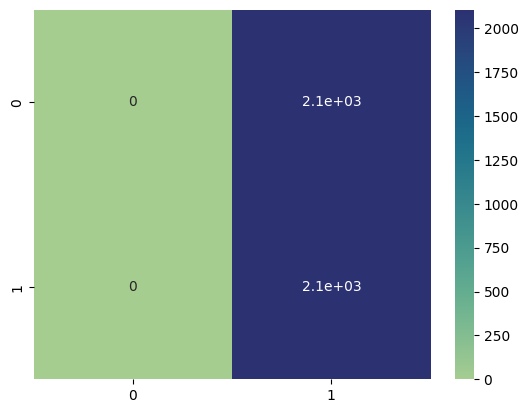

In [ ]:
# print the confusion matrix

cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, cmap="crest")

In [ ]:
cf_matrix

array([[   0, 2094],
       [   0, 2106]])

#### Now print other metrics such as accuracy, precision, recall, and F1 score

In [ ]:
print(accuracy_score(y_test, y_pred))

0.5014285714285714


In [ ]:
print(precision_score(y_test, y_pred))

0.5014285714285714


In [ ]:
print(recall_score(y_test, y_pred))

1.0


In [ ]:
print(f1_score(y_test, y_pred))

0.6679352997145577


# XGBoost Model

In [ ]:
import time
from xgboost import XGBClassifier

In [ ]:
model = XGBClassifier(
    tree_method = "gpu_hist",
    eval_metric=["error", "auc"], n_estimators=2, max_depth=6,
                         learning_rate=0.1, early_stopping_rounds=20
)       #gEt the XGBoost model

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y_train = le.fit_transform(y_train)
Y_test = le.fit_transform(y_test)  # transform the y data into XGBoost format

In [ ]:
# define the eval set and metric
eval_set = [(X_train, y_train), (X_test, y_test)]
eval_metric = ["auc","error"]# fit the model
model.fit(X_train, Y_train, eval_set=eval_set, verbose=False)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:39:03] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=20,
              enable_categorical=False, eval_metric=['error', 'auc'],
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=2,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

In [ ]:
# final model assessment
pred_test = model.predict(X_test)
pred_train = model.predict(X_train)
print('Train Accuracy: ', accuracy_score(Y_train, pred_train))
print('Test Accuraccy: ', accuracy_score(Y_test, pred_test))

Train Accuracy:  0.999702380952381
Test Accuraccy:  0.9995238095238095


In [ ]:
print ('Accuracy:', accuracy_score(y_test, pred_test))
print ('F1 score:', f1_score(y_test, pred_test))
print ('Recall:', recall_score(y_test, pred_test))
print ('Precision:', precision_score(y_test, pred_test))

Accuracy: 0.9995238095238095
F1 score: 0.9995271867612293
Recall: 1.0
Precision: 0.999054820415879


In [ ]:
# Make predictions

y_pred = model.predict(X_test)

<Axes: >

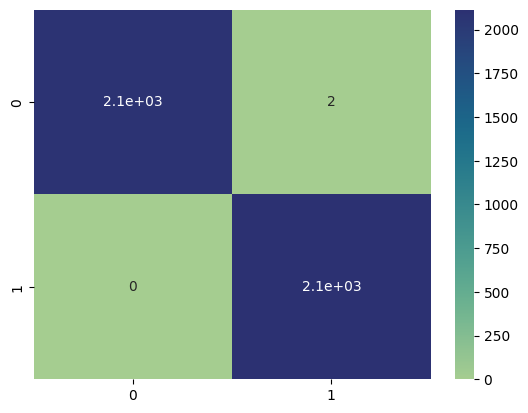

In [ ]:
# print the confusion matrix

cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, cmap="crest")

In [ ]:
cf_matrix

array([[2082,    3],
       [   0, 2115]])

In [ ]:
# Save the model

filename = "XGB_model.pickle"

# save model
pickle.dump(model, open(filename, "wb"))

# Two more models

## Decision Tree Classifier

In [ ]:
# Decision Tree Classifier model
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# instantiate the model
tree = DecisionTreeClassifier(max_depth=30)

# fit the model
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30)

In [ ]:
#predicting the target value from the model for the samples

y_train_tree = tree.predict(X_train)
y_test_tree = tree.predict(X_test)

In [ ]:
print('Train Accuracy: ', accuracy_score(Y_train, y_train_tree))
print('Test Accuraccy: ', accuracy_score(Y_test, y_test_tree ))

Train Accuracy:  1.0
Test Accuraccy:  0.9997619047619047


In [ ]:
print ('Accuracy:', accuracy_score(y_test, y_test_tree))
print ('F1 score:', f1_score(y_test, y_test_tree))
print ('Recall:', recall_score(y_test, y_test_tree))
print ('Precision:', precision_score(y_test, y_test_tree))

Accuracy: 0.9997619047619047
F1 score: 0.9997635374793096
Recall: 1.0
Precision: 0.9995271867612293


In [ ]:
# Make predictions

y_pred = tree.predict(X_test)

<Axes: >

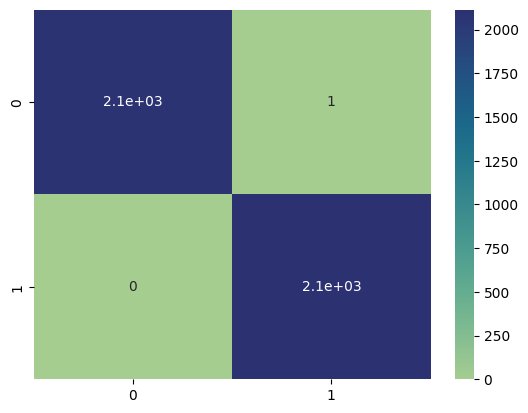

In [ ]:
# print the confusion matrix

cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, cmap="crest")

In [ ]:
cf_matrix

array([[2085,    1],
       [   0, 2114]])

In [ ]:
# Save the model

filename = "DTree.pickle"

# save model
pickle.dump(model, open(filename, "wb"))

## Random Forest model

In [ ]:
# Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# instantiate the model
forest = RandomForestClassifier(n_estimators=2)

# fit the model
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=2)

In [ ]:
#predicting the target value from the model for the samples
y_train_forest = forest.predict(X_train)
y_test_forest = forest.predict(X_test)

In [ ]:
print('Train Accuracy: ', accuracy_score(Y_train, y_train_forest))
print('Test Accuraccy: ', accuracy_score(Y_test, y_test_forest))

Train Accuracy:  0.90375
Test Accuraccy:  0.7416666666666667


In [ ]:
print('Accuracy:', accuracy_score(y_test, y_test_forest))
print('F1 score:', f1_score(y_test, y_test_forest))
print('Recall:', recall_score(y_test, y_test_forest))
print('Precision:', precision_score(y_test, y_test_forest))

Accuracy: 0.7416666666666667
F1 score: 0.6886657101865136
Recall: 0.5676442762535477
Precision: 0.87527352297593


In [ ]:
# Make predictions

y_pred = forest.predict(X_test)

<Axes: >

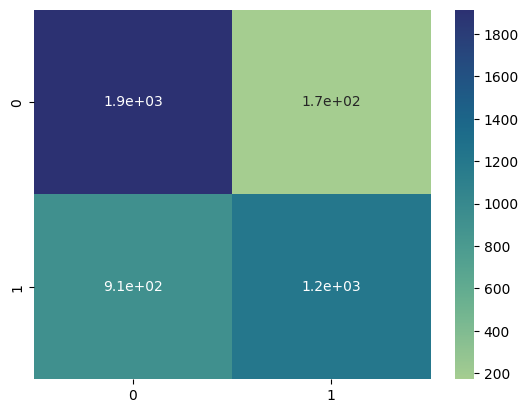

In [ ]:
# print the confusion matrix

cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, cmap="crest")

In [ ]:
cf_matrix

array([[1915,  171],
       [ 914, 1200]])

In [ ]:
# Save the model

filename = "Forest.pickle"

# save model
pickle.dump(model, open(filename, "wb"))

In [ ]:
# assign KNN algorithm with k=1

knn = KNeighborsClassifier(n_neighbors=100)

In [ ]:
# Change the data type of train features

X_train.columns = X_train.columns.astype(str)

In [ ]:
# Train/fit the data using the training data

knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=100)

In [ ]:
# Make predictions on the test data and save the predicted results to y_pred

y_pred=knn.predict(X_test)

In [ ]:
# match the predicted values and actual y_test to get the accuracy of the model

accuracy = np.mean(y_pred == y_test)

In [ ]:
print(accuracy)

0.9816666666666667
